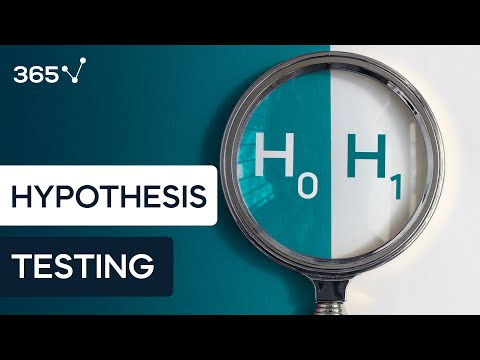

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

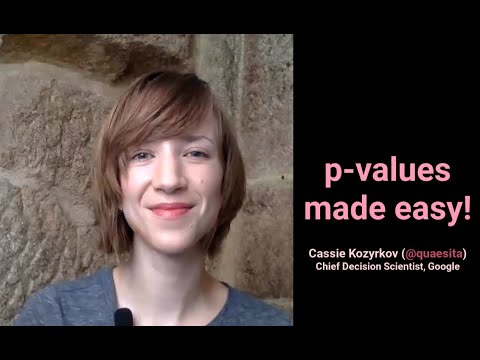

In [2]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

Question #1: The main difference between something that can and cannot be tested statistically is something quantifiable to compare it to. For example, in the video, the apple example was only a hypothesis once the value of $1.75 was brought into the picture. The null hypothesis usually means that there is no effect, the alternative usually means that there is an effect. The same was courts use innocent until proven guilty, we run with the idea of the null hypothesis being true and use the test results to try and reject it.

Question #2: It means that when we test the hypothesis, the conclusions we draw from the result are about the entire population, not just the sample we tested on.

Question #3: When finding the p value, we assume the null hypothesis is true (the same as innocent until proven guitly). This helps us tell if the data we get is unusual and can help us determine if we should accept or reject the null hypothesis.

Question #4: Smaller p value means if the null hypothesis is true the data observed is unlikely to happen. If the data is truly random and the data observed is unlikely to happen if the null hypothesis is true, this would suggest that the null hypothesis being false.

Question #5:

Null Hypothesis (H0): People have no preference for head tilt direction when kissing, i.e., the probability of tilting right is 0.5.
Alternative Hypothesis (HA): People tend to tilt their heads to the right more often when kissing (right tilt > 0.5).
Observed Data: 80 couples tilted to the right out of 124, so the observed proportion is 64.5%

For each couple, simulate whether they tilt their head to the right or left by flipping a fair coin (since the null hypothesis assumes equal probability).
If heads, count that as a right tilt; if tails, count it as a left tilt.

Perform the coin flip 124 times, 1 time for each couple. Caculate the porportion of coins that landed heads vs tails to represent the head tilts.

Repeat this process many, many times to build a distribution.

Find the proportion of simulations where the number of right-tilts was 80 or more. This will give you an approximate p-value.

The simulated p-value is: 0.0008


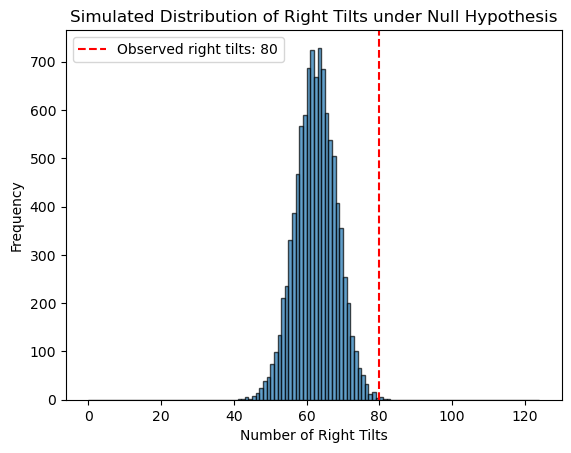

Strength of evidence against the null hypothesis: Extremely strong evidence


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Number of couples and observed right-tilt counts
n_couples = 124
observed_right_tilts = 80

# Simulate 10,000 trials of 124 coin flips (where 1 = right tilt, 0 = left tilt)
n_simulations = 10000
simulations = np.random.binomial(n=n_couples, p=0.5, size=n_simulations)

# Calculate the p-value (proportion of simulations where the count >= 80)
p_value = np.mean(simulations >= observed_right_tilts)

# Print the p-value
print(f"The simulated p-value is: {p_value:.4f}")

# Plotting the distribution of simulated results
plt.hist(simulations, bins=range(n_couples+1), edgecolor='black', alpha=0.7)
plt.axvline(observed_right_tilts, color='red', linestyle='dashed', linewidth=1.5, label=f'Observed right tilts: {observed_right_tilts}')
plt.title('Simulated Distribution of Right Tilts under Null Hypothesis')
plt.xlabel('Number of Right Tilts')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Strength of evidence based on p-value
if p_value > 0.1:
    strength = "Weak or no evidence"
elif 0.05 < p_value <= 0.1:
    strength = "Moderate evidence"
elif 0.01 < p_value <= 0.05:
    strength = "Strong evidence"
elif 0.001 < p_value <= 0.01:
    strength = "Very strong evidence"
else:
    strength = "Extremely strong evidence"

print(f"Strength of evidence against the null hypothesis: {strength}")

Question #6: A smaller p value cannot definitely prove the null hypothesis is false, it can only suggest that the data is unlikely to occur if the null hypothesis is true.

Question #7: Null Hypothesis (H0): The vaccine has no effect on health scores (mean change in health scores is less than or equal to zero).

Alternative Hypothesis (HA): The vaccine has a positive effect on health scores (mean change in health scores is greater than zero).

For a one-tailed test, the p-value will be calculated as the proportion of simulated means that are less than or equal to the observed mean of health changes.

The p-value from a one-tailed test will generally be smaller than the p-value from a two-tailed test if the observed effect is in the direction specified by the alternative hypothesis because all of the significance is concentrated in one tail.

   PatientID  Age Gender  InitialHealthScore  FinalHealthScore  HealthChange
0          1   45      M                  84                86             2
1          2   34      F                  78                86             8
2          3   29      M                  83                80            -3
3          4   52      F                  81                86             5
4          5   37      M                  81                84             3
5          6   41      F                  80                86             6
6          7   33      M                  79                86             7
7          8   48      F                  85                82            -3
8          9   26      M                  76                83             7
9         10   39      F                  83                84             1


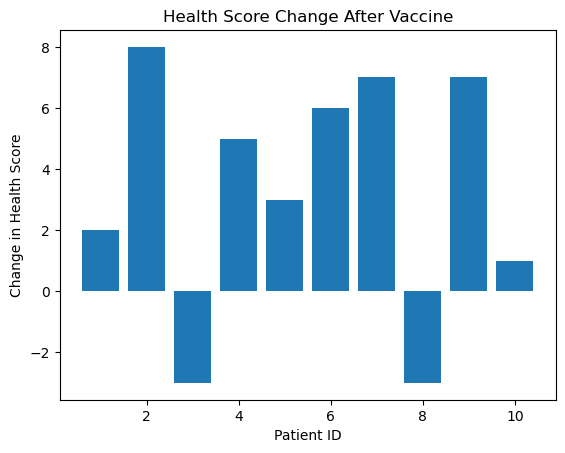

Observed Mean Change in Health Score: 3.30
One-tailed p-value: 0.4986
Strength of evidence against the null hypothesis: Weak or no evidence


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the dataset
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate the change in health scores
data['HealthChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Display the data to confirm everything is loaded correctly
print(data)

# Visualize the change in health scores
plt.bar(data['PatientID'], data['HealthChange'])
plt.xlabel('Patient ID')
plt.ylabel('Change in Health Score')
plt.title('Health Score Change After Vaccine')
plt.show()

# Calculate observed mean health change
observed_mean = data['HealthChange'].mean()
print(f"Observed Mean Change in Health Score: {observed_mean:.2f}")

# Define the bootstrap function to compute the confidence interval and p-value
def bootstrap_p_value(data, n_bootstrap_samples=10000):
    np.random.seed(42)
    bootstrap_means = np.empty(n_bootstrap_samples)
    
    for i in range(n_bootstrap_samples):
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means[i] = np.mean(boot_sample)
    
    # Calculate one-tailed p-value
    p_value = np.mean(bootstrap_means <= observed_mean)
    
    return p_value

# Apply bootstrapping to health score changes
health_changes = data['HealthChange'].values
p_value = bootstrap_p_value(health_changes)

# Display the one-tailed p-value
print(f"One-tailed p-value: {p_value:.4f}")

# Strength of evidence based on the p-value
if p_value > 0.1:
    strength = "Weak or no evidence"
elif 0.05 < p_value <= 0.1:
    strength = "Moderate evidence"
elif 0.01 < p_value <= 0.05:
    strength = "Strong evidence"
elif 0.001 < p_value <= 0.01:
    strength = "Very strong evidence"
else:
    strength = "Extremely strong evidence"

print(f"Strength of evidence against the null hypothesis: {strength}")

Changes Made:

Hypothesis Statements: Defined a one-tailed hypothesis.
Observed Mean Calculation: Added calculation for the observed mean change in health scores.
P-value Calculation: The p-value is calculated based on the proportion of bootstrap means that are less than or equal to the observed mean, reflecting a one-tailed test.

A smaller p-value from the one-tailed test indicates stronger evidence against the null hypothesis compared to a two-tailed test, as it focuses all significance on one side of the distribution.

Question #8:

Null Hypothesis (H0): The proportion of students who can correctly identify the pouring order is equal to 0.5, suggesting that any observed success is due to random guessing.

Alternative Hypothesis (HA): The proportion of students who can correctly identify the pouring order is greater than 0.5, suggesting that they have a genuine ability to discern the order.

Interpretation: We are testing whether students can identify the order of pouring tea and milk better than would be expected by chance. If they perform better than random guessing (50% accuracy), it may indicate a true ability to taste the difference.

Correct identifications: 49
Total students: 80

Observed proportion of correct identifications is 0.6125

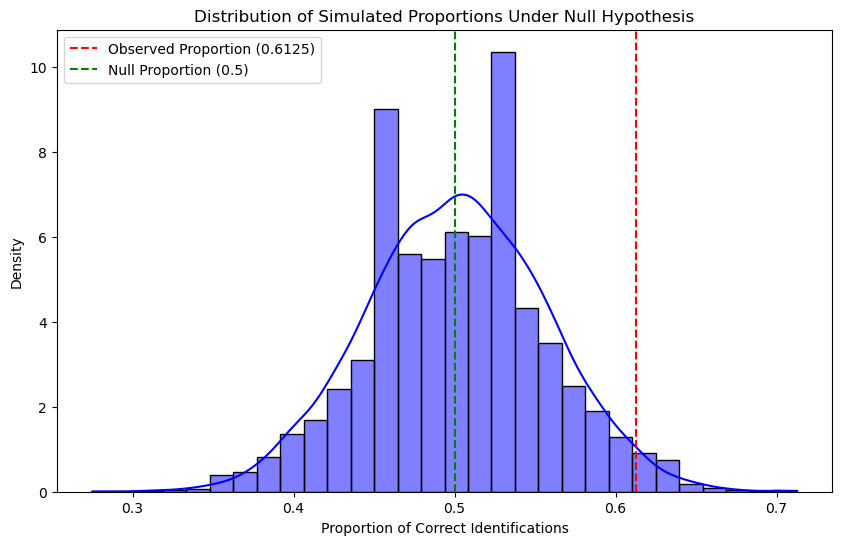

P-value: 0.0294


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Observed data
n_students = 80
n_correct = 49
observed_proportion = n_correct / n_students

# Null hypothesis proportion
null_proportion = 0.5

# Simulation parameters
n_simulations = 10000
simulated_correct = np.random.binomial(n_students, null_proportion, n_simulations)

# Calculate the p-value
p_value = np.mean(simulated_correct / n_students >= observed_proportion)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.histplot(simulated_correct / n_students, bins=30, kde=True, color='blue', stat='density')
plt.axvline(observed_proportion, color='red', linestyle='--', label='Observed Proportion (0.6125)')
plt.axvline(null_proportion, color='green', linestyle='--', label='Null Proportion (0.5)')
plt.title('Distribution of Simulated Proportions Under Null Hypothesis')
plt.xlabel('Proportion of Correct Identifications')
plt.ylabel('Density')
plt.legend()
plt.show()

# Display p-value
print(f"P-value: {p_value:.4f}")

The p-value 0.0294 < 0.05. This result suggests that there is strong evidence against the null hypothesis, which states that the proportion of students who can correctly identify the order of milk and tea being poured is equal to 0.5 (i.e., they are guessing randomly).

This means that the results of our experiment provide statistically significant evidence that the students can taste a difference based on the order in which milk and tea are poured. Therefore, the assumption that the students' success is solely due to guessing is unlikely to be true.

Question #9: Yes

Chat GPT Log: https://chatgpt.com/share/670f300d-9934-8011-b803-7b2a18128661